In [1]:
import os
import cv2 
import math
import random
import torch
import torchvision
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import logging
import data_normalizer_c as dnc

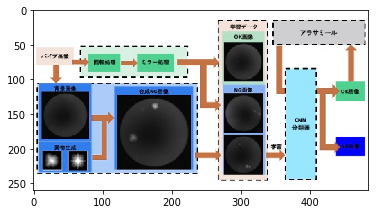

True

In [7]:
simg=cv2.imread("smnr4.jpg")
rimg = cv2.resize(simg,(242*2,130*2))
plt.imshow(rimg)
plt.show()
cv2.imwrite("smnr5.jpg",rimg)

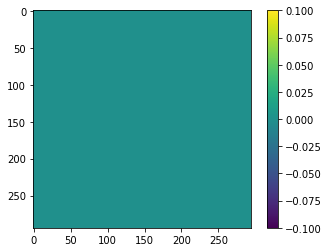

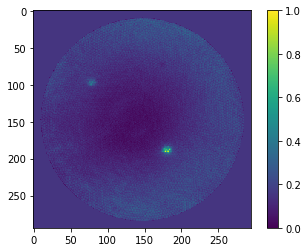

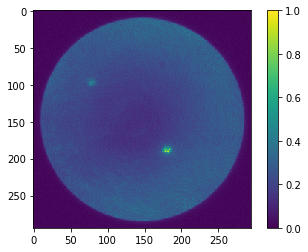

(294, 294, 3)


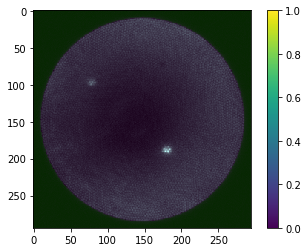

In [47]:
target = "NG_2019-11-14_10-24-50-4130.bmp"
path = "/home/lin/pyProject/pipe-roughness/90/203/cut/bp"

oi = plt.imread(os.path.join(path,target))
l1 = np.zeros((294,294),np.float32)
cv2.normalize(oi,l1,255,0,cv2.NORM_MINMAX)
ni = dnc.Normalize_circle_minmax(dnc.Normalize_circle(oi,t_var=5))
mi = dnc.Normalize_circle_minmax(oi)
plt.imshow(l1)
plt.colorbar()
plt.show()
plt.imshow(ni)
plt.colorbar()
plt.show()
plt.imshow(mi)
plt.colorbar()
plt.show()

output = np.zeros((294,294,3))
for w,h in np.argwhere(oi>=0):
    output[w,h,0]=oi[w,h]/255.
    output[w,h,1]=ni[w,h]
    output[w,h,2]=mi[w,h]
print(output.shape)
plt.imshow(output)
plt.colorbar()
plt.show()
# cv2.imwrite("tstmix.bmp",255.*output)


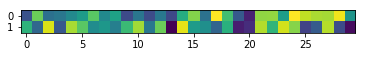

In [13]:
tensor = torch.rand(2,30)
plt.imshow(tensor)
plt.show()

In [3]:
path = "clustering_result"
print(os.path.isfile(path))
print(os.path.isdir(path))

False
True


In [123]:
gp_list = os.listdir("/home/lin/pyProject/pipe-roughness/dab3/gp")
bp_list = os.listdir("/home/lin/pyProject/pipe-roughness/dab3/bp")

save_path = "/home/lin/pyProject/pipe-roughness/90/syn+"

for i in range(5000):
    rn = random.randint(0,30240)
    gp_img = plt.imread("/home/lin/pyProject/pipe-roughness/dab3/gp/"+gp_list[rn])
    bp_img = plt.imread("/home/lin/pyProject/pipe-roughness/dab3/bp/"+bp_list[rn])
    cv2.imwrite(os.path.join(save_path,"gp",gp_list[rn]),gp_img)
    cv2.imwrite(os.path.join(save_path,"bp",bp_list[rn]),bp_img)

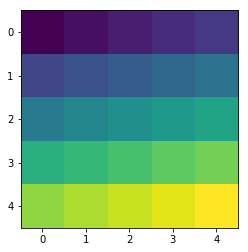

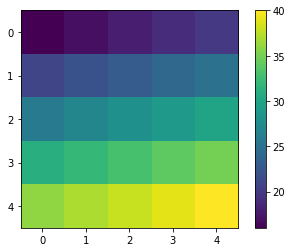

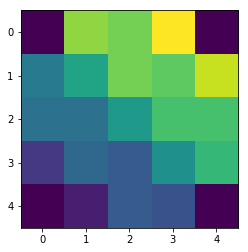

In [108]:
image = torch.range(1,25)
image = torch.reshape(image,(5,5))
image = image.numpy()
plt.imshow(image)
plt.show()

plt.imshow(image-10+25)
plt.colorbar()
plt.show()

p =np.unravel_index(np.argmax(image,axis=None),image.shape)
cx,cy =image.shape
cx=int(cx/2)
cy=int(cy/2)
dx=p[0]-cx
dy=p[1]-cy
if dy>0:
    angle = 180+math.atan(-dx/dy)*180/math.pi
else:
    angle = math.atan(-dx/dy)*180/math.pi

RM = cv2.getRotationMatrix2D((cx,cy),angle,1)
rotation = cv2.warpAffine(image,RM,image.shape,0,0,0)
plt.imshow(rotation)
plt.show()


In [51]:
torch.cuda.is_available()

True

In [56]:
a = torch.range(1,15)
a = torch.reshape(a,(3,5))
print("a",a)
b = torch.mean(a,dim=1) #average
print("b",b)
c = a.clone()
for i in range(b.size()[0]):
    c[i] -= b[i]
print("c",c)
d = torch.sqrt(torch.mean(torch.pow(c,2),dim=1)) #std
print("d",d)
for i in range(e.size()[0]):
   a[i] = (a[i]-b[i])/d[i]
print("a",a)
print(torch.sum(a,dim=1))

a tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15.]])
b tensor([ 3.,  8., 13.])
c tensor([[-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.]])
d tensor([1.4142, 1.4142, 1.4142])
a tensor([[-1.4142, -0.7071,  0.0000,  0.7071,  1.4142],
        [-1.4142, -0.7071,  0.0000,  0.7071,  1.4142],
        [-1.4142, -0.7071,  0.0000,  0.7071,  1.4142]])
tensor([0., 0., 0.])


In [13]:
data = []
for i in range(6):
    temp = []
    if i<3:
        label = 0
    else:
        label = 1
    for j in range(3):
        temp.append(i*3+j+1)
    temp_array = np.array(temp)
    data.append(np.append(temp_array,label))
    
print(data)

[array([1, 2, 3, 0]), array([4, 5, 6, 0]), array([7, 8, 9, 0]), array([10, 11, 12,  1]), array([13, 14, 15,  1]), array([16, 17, 18,  1])]


In [3]:
from som_pytorch import self_organizing_map

In [14]:
dataset = torch.tensor(data)
som = self_organizing_map(10,10,3,dataset=dataset,max_epoch=20000,initial_radius=3,initial_learning_rate=0.5)
before = np.array(som.Weights_output())
print(before)
label_map = som.Map_output()
# plt.imshow(label_map)
# plt.colorbar()
# plt.show()
som.Train()
after = np.array(som.Weights_output())
print(after)
# print(after-before)

[[0.14850265 0.5195267  0.7922934 ]
 [0.5895995  0.7690244  0.12571228]
 [0.50651467 0.24122524 0.62117594]
 [0.8496697  0.31659335 0.6497546 ]
 [0.6582093  0.41760504 0.12440854]
 [0.47057706 0.6528542  0.831598  ]
 [0.16123164 0.9063122  0.6103093 ]
 [0.05810732 0.4172657  0.4700613 ]
 [0.9340427  0.15452081 0.4470942 ]
 [0.88788015 0.33760864 0.4982878 ]
 [0.7942918  0.581844   0.84007806]
 [0.05719793 0.46236074 0.04152811]
 [0.7225958  0.8403615  0.19966328]
 [0.16553867 0.16931444 0.9863644 ]
 [0.07139832 0.58995056 0.05865383]
 [0.99785894 0.33633178 0.6327083 ]
 [0.9695395  0.04285246 0.53392106]
 [0.58176386 0.8140579  0.9440587 ]
 [0.8132908  0.56233984 0.17173421]
 [0.02538896 0.12988156 0.54185206]
 [0.74966437 0.56871283 0.7202292 ]
 [0.6459253  0.16859299 0.03837919]
 [0.29479456 0.34673375 0.50498635]
 [0.74107945 0.33014923 0.18069375]
 [0.6825635  0.5892019  0.76688963]
 [0.19812036 0.81498426 0.7998622 ]
 [0.9502017  0.79809576 0.3555764 ]
 [0.05559266 0.9917089  0.50

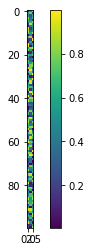

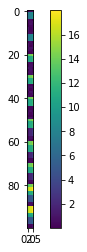

In [15]:
plt.imshow(before)
plt.colorbar()
plt.show()
plt.imshow(after)
plt.colorbar()
plt.show()

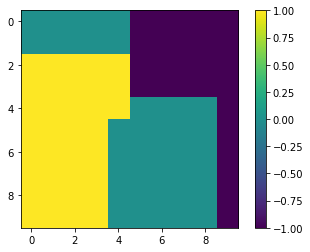

In [16]:
label_map = som.Map_output()
plt.imshow(label_map)
plt.colorbar()
plt.show()

In [37]:
print(dataset)
print(len(dataset))

tensor([[ 1,  2,  3,  0],
        [ 4,  5,  6,  0],
        [ 7,  8,  9,  0],
        [10, 11, 12,  1],
        [13, 14, 15,  1],
        [16, 17, 18,  1]])
6


In [41]:
for data_tensor in torch.utils.data.DataLoader(dataset,shuffle=True):
    element = data_tensor[0][:-1]
    label = data_tensor[0][-1:]
    print("data_tensor",data_tensor)
    print("element",element)
    print("label",label)

data_tensor tensor([[7, 8, 9, 0]])
element tensor([7, 8, 9])
label tensor([0])
data_tensor tensor([[10, 11, 12,  1]])
element tensor([10, 11, 12])
label tensor([1])
data_tensor tensor([[13, 14, 15,  1]])
element tensor([13, 14, 15])
label tensor([1])
data_tensor tensor([[1, 2, 3, 0]])
element tensor([1, 2, 3])
label tensor([0])
data_tensor tensor([[4, 5, 6, 0]])
element tensor([4, 5, 6])
label tensor([0])
data_tensor tensor([[16, 17, 18,  1]])
element tensor([16, 17, 18])
label tensor([1])


In [55]:
def DS(data):
    return torch.tensor(data)
dataset = DS(data)
for element in dataset:
    print(element)
    print(element.shape)

tensor([1, 2, 3])
torch.Size([3])
tensor([4, 5, 6])
torch.Size([3])
tensor([7, 8, 9])
torch.Size([3])
tensor([10, 11, 12])
torch.Size([3])
tensor([13, 14, 15])
torch.Size([3])


In [62]:
loader = torch.utils.data.DataLoader(dataset,shuffle=True)
for element in loader:
    print(element[0])
    print(element)
    print((element-sub)**2)
    print(math.sqrt(torch.sum((element-sub)**2)))

tensor([4, 5, 6])
tensor([[4, 5, 6]])
tensor([[ 9, 16, 25]])
7.0710678118654755
tensor([7, 8, 9])
tensor([[7, 8, 9]])
tensor([[36, 49, 64]])
12.206555615733702
tensor([13, 14, 15])
tensor([[13, 14, 15]])
tensor([[144, 169, 196]])
22.561028345356956
tensor([1, 2, 3])
tensor([[1, 2, 3]])
tensor([[0, 1, 4]])
2.23606797749979
tensor([10, 11, 12])
tensor([[10, 11, 12]])
tensor([[ 81, 100, 121]])
17.378147196982766


In [82]:
su = torch.tensor([1,1,1])
re = []
for element in loader:
    re.append(torch.sum(element[0]-su))
print(re)
re = np.array(re)
print(np.argmin(re))

[tensor(21), tensor(39), tensor(30), tensor(12), tensor(3)]
4
